In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    
    e = y-tx.dot(w)
    
    return np.sum(e*e)*1/(2*len(y))

#print(compute_loss(y,tx,np.array([1,2])))


# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    
    for i, z0 in enumerate(w0):
        for j, z1 in enumerate(w1):
            losses[i,j] = compute_loss(y,tx,np.array([z0,z1]))
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.793541019523236, w0*=71.42857142857142, w1*=15.306122448979579, execution time=11.993 seconds


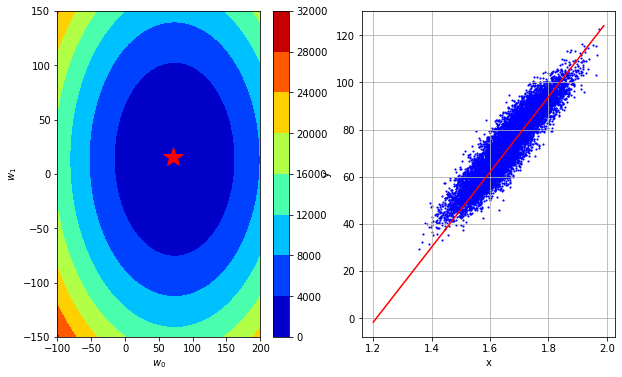

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    
    return -1/len(y) * np.transpose(tx).dot(y-tx.dot(w))

Please fill in the functions `gradient_descent` below:

In [26]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        
        loss = compute_loss(y, tx, w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        
        w = w - gamma*compute_gradient(y,tx,w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        #print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    
    print(("Gradient Descent: loss={l}, w0={w0}, w1={w1}".format(l=losses[-1], w0=w[0], w1=w[1])))
    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [60]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent: loss=13.643434811522654, w0=73.63227245973111, w1=14.475704876437092
Gradient Descent: execution time=0.003 seconds


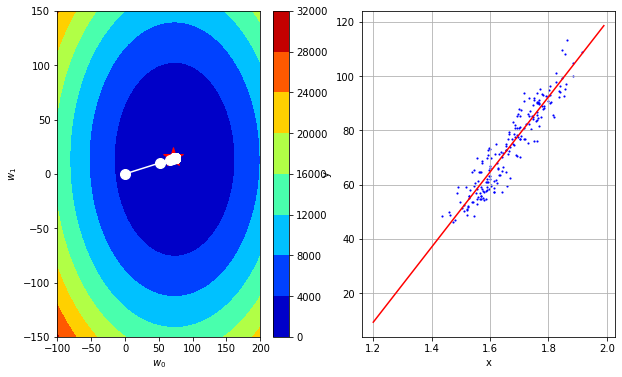

In [61]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure_gd(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

#interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))
plot_figure_gd(len(gradient_ws))

# 4 Stochastic gradient descent

In [51]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    #print("COMPUTE STOCH GRADIENT:", np.transpose(tx).dot(y-tx.dot(w)))
    return -1*np.transpose(tx).dot(y-tx.dot(w))

def unif_rand_gd(y, tx, w):
    n = np.random.randint(len(y))
    return tx[n]*(-1)*(y[n]-tx[n].dot(w))

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    
    ws = [initial_w]
    losses = []
    w = initial_w
    
    """
    for y_b, tx_b in batch_iter(y, tx, batch_size, max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        #rint("sampled batch", y_b, tx_b)
        #print(y_b.shape, tx_b.shape)
        loss = compute_loss(y, tx, w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        
        w = w - gamma*compute_stoch_gradient(y_b,tx_b,w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        #print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(bi=0, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    """
    
    for num_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        w = w - gamma*unif_rand_gd(y,tx,w)
        ws.append(w)
        losses.append(loss)
        
    
    print(("Stochastic Gradient Descent: loss={l}, w0={w0}, w1={w1}".format(l=losses[-1], w0=w[0], w1=w[1])))
    return losses, ws

In [54]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.2
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent: loss=16.662862099476516, w0=72.84193292016502, w1=11.550236772257005
SGD: execution time=6.599 seconds


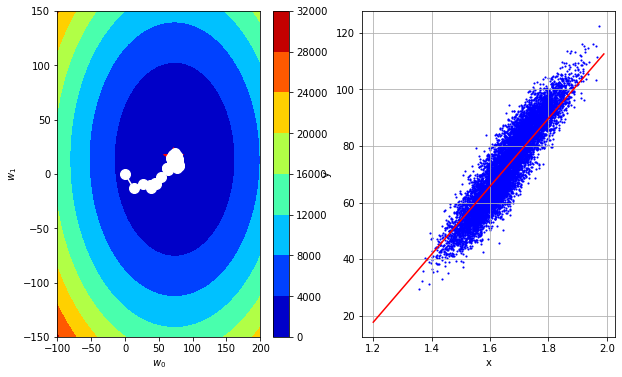

In [55]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure_sgd(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

#interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))
plot_figure_sgd(len(sgd_ws))

# 5 Effect of Outliers

### Exercise 5


In [84]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [85]:
y.shape, tx.shape

((204,), (204, 2))

Gradient Descent: loss=107.39298619596748, w0=74.60493150031697, w1=8.099613917526531
Gradient Descent: execution time=0.005 seconds


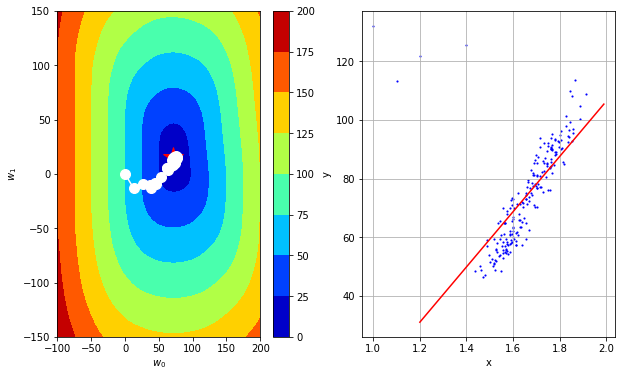

In [86]:
# Define the parameters of the algorithm.
max_iters = 60
gamma = 0.3

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure_gd(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

#interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))
plot_figure(len(gradient_ws))

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [78]:
def compute_loss_mae(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    
    e = y-tx.dot(w)
    
    return np.sum(np.abs(e))*1/len(y)

Sub-gradient Descent: loss=6.478967510719255, w0=72.26470588235293, w1=15.776612807109332
Sub-gradient Descent: execution time=0.005 seconds


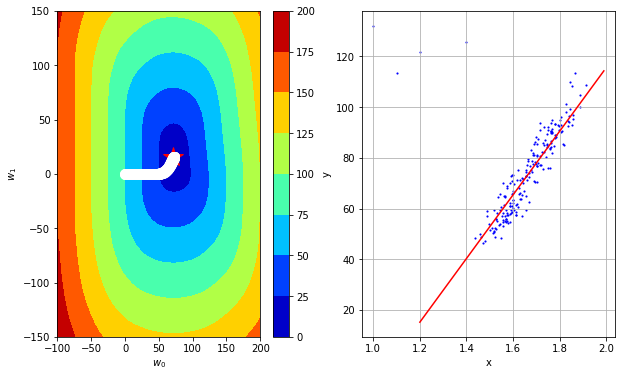

In [83]:
def grid_search_mae(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    
    for i, z0 in enumerate(w0):
        for j, z1 in enumerate(w1):
            losses[i,j] = compute_loss_mae(y,tx,np.array([z0,z1]))
    
    return losses

grid_losses = grid_search_mae(y, tx, grid_w0, grid_w1)

def compute_subgradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    
    return -1/len(y) * np.transpose(tx).dot(np.sign(y-tx.dot(w)))

def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        
        loss = compute_loss_mae(y, tx, w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        
        w = w - gamma*compute_subgradient(y,tx,w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        #print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    
    print(("Sub-gradient Descent: loss={l}, w0={w0}, w1={w1}".format(l=losses[-1], w0=w[0], w1=w[1])))
    return losses, ws

# Define the parameters of the algorithm.
max_iters = 200
gamma = 0.5

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Sub-gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure_subgd(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

#interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))
plot_figure_subgd(len(gradient_ws))